In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
y_train = df_train.iloc[:,-1].values
df_train.drop(["SalePrice"],axis=1,inplace=True)
df=pd.concat([df_train,df_test])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [38]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [10]:
corr = df_train.corr()['SalePrice']
corr.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [39]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
df.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish',  'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],inplace=True,axis=1)

In [41]:
df.head()

OverallQual  TotalBsmtSF  GrLivArea  GarageCars  GarageArea
0            7        856.0       1710         2.0       548.0
1            6       1262.0       1262         2.0       460.0
2            7        920.0       1786         2.0       608.0
3            7        756.0       1717         3.0       642.0
4            8       1145.0       2198         3.0       836.0

In [42]:
df.isnull().sum()

OverallQual    0
TotalBsmtSF    1
GrLivArea      0
GarageCars     1
GarageArea     1
dtype: int64

In [45]:
df[['TotalBsmtSF','GarageArea','GarageCars']] = df[['TotalBsmtSF','GarageArea','GarageCars']].fillna(df[['TotalBsmtSF','GarageArea','GarageCars']].mean())

In [46]:
df.isnull().sum()

OverallQual    0
TotalBsmtSF    0
GrLivArea      0
GarageCars     0
GarageArea     0
dtype: int64

In [47]:
df.shape

(2919, 5)

In [48]:
df_train.shape

(1460, 80)

In [49]:
df_test.shape

(1459, 80)

In [50]:
def featureNormalization(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    
    X_norm = (x - mean)/std
    
    return X_norm

In [51]:
x_train=df.iloc[:1460,:].values

x_test=df.iloc[1460:,:].values

In [52]:
m,n=x_train.shape[0],x_train.shape[1]
x_train = featureNormalization(x_train)
x_train = np.append(np.ones((m,1)),x_train,axis=1)
theta=np.zeros((n+1,1))

In [53]:
def MSE(x,y,theta):
    m =len(y)
    predictions=x.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [54]:
def gradientDescent(x,y,theta,alpha,num_iters):

    m=len(y)
    mse=[]
    
    for i in range(num_iters):
        
        print("vong lap thu: ", i)
        predictions = x.dot(theta)
        error = np.dot(x.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        print(theta)
        mse.append(MSE(x,y,theta))
    
    return theta, mse

In [55]:
theta, mse = gradientDescent(x_train,y_train.reshape(m,1),theta,0.01,1000)

vong lap thu:  0
[[1809.2119589 ]
 [ 628.16034687]
 [ 487.27678598]
 [ 562.75619727]
 [ 508.58283327]
 [ 495.09989693]]
vong lap thu:  1
[[3600.33179822]
 [1238.24381095]
 [ 959.12300129]
 [1109.2449817 ]
 [ 999.19043326]
 [ 972.2195584 ]]
vong lap thu:  2
[[5373.54043914]
 [1830.81963976]
 [1416.02978719]
 [1639.97472908]
 [1472.412874  ]
 [1431.95039883]]
vong lap thu:  3
[[7129.01699365]
 [2406.43886396]
 [1858.472557  ]
 [2155.43759094]
 [1928.82118057]
 [1874.86473742]]
vong lap thu:  4
[[8866.93878262]
 [2965.63488203]
 [2286.91150096]
 [2656.11001482]
 [2368.96794171]
 [2301.51641228]]
vong lap thu:  5
[[10587.4813537 ]
 [ 3508.92402625]
 [ 2701.79207468]
 [ 3142.45324803]
 [ 2793.38790273]
 [ 2712.44137474]]
vong lap thu:  6
[[12290.81849907]
 [ 4036.80611042]
 [ 3103.5454721 ]
 [ 3614.9138251 ]
 [ 3202.59853932]
 [ 3108.15826461]]
vong lap thu:  7
[[13977.12227298]
 [ 4549.76496004]
 [ 3492.58908309]
 [ 4073.92403958]
 [ 3597.100613  ]
 [ 3489.16896694]]
vong lap thu:  8
[[156

vong lap thu:  344
[[175276.61649736]
 [ 29666.39345867]
 [ 14668.01609556]
 [ 23849.91228259]
 [  9998.06162729]
 [  6664.52485953]]
vong lap thu:  345
[[175333.06229129]
 [ 29680.06077381]
 [ 14664.69466765]
 [ 23853.55316009]
 [  9994.47063978]
 [  6654.77783095]]
vong lap thu:  346
[[175388.94362728]
 [ 29693.66403849]
 [ 14661.37943015]
 [ 23857.15418086]
 [  9990.91690423]
 [  6645.08223757]]
vong lap thu:  347
[[175444.26614991]
 [ 29707.20358341]
 [ 14658.07043471]
 [ 23860.71567983]
 [  9987.40013828]
 [  6635.43775308]]
vong lap thu:  348
[[175499.03544731]
 [ 29720.67973728]
 [ 14654.76773199]
 [ 23864.23798927]
 [  9983.92006149]
 [  6625.84405324]]
vong lap thu:  349
[[175553.25705175]
 [ 29734.09282675]
 [ 14651.47137163]
 [ 23867.72143874]
 [  9980.47639535]
 [  6616.30081587]]
vong lap thu:  350
[[175606.93644013]
 [ 29747.44317648]
 [ 14648.18140234]
 [ 23871.16635517]
 [  9977.06886324]
 [  6606.80772086]]
vong lap thu:  351
[[175660.07903464]
 [ 29760.73110914]
 [ 14

[[180444.88615646]
 [ 31690.10348495]
 [ 14077.3388655 ]
 [ 24084.70264595]
 [  9766.35829089]
 [  5257.18769125]]
vong lap thu:  591
[[180449.6492538 ]
 [ 31694.61940304]
 [ 14075.8285102 ]
 [ 24084.36467558]
 [  9766.81784948]
 [  5253.95852989]]
vong lap thu:  592
[[180454.36472016]
 [ 31699.11567711]
 [ 14074.32422681]
 [ 24084.02317271]
 [  9767.28232617]
 [  5250.74115966]]
vong lap thu:  593
[[180459.03303186]
 [ 31703.59239609]
 [ 14072.82599759]
 [ 24083.67818327]
 [  9767.75167585]
 [  5247.53551667]]
vong lap thu:  594
[[180463.65466045]
 [ 31708.04964846]
 [ 14071.33380477]
 [ 24083.32975278]
 [  9768.22585374]
 [  5244.34153744]]
vong lap thu:  595
[[180468.23007275]
 [ 31712.48752227]
 [ 14069.84763058]
 [ 24082.97792636]
 [  9768.70481539]
 [  5241.15915888]]
vong lap thu:  596
[[180472.75973093]
 [ 31716.90610516]
 [ 14068.36745725]
 [ 24082.62274876]
 [  9769.18851672]
 [  5237.98831833]]
vong lap thu:  597
[[180477.24409252]
 [ 31721.3054843 ]
 [ 14066.89326704]
 [ 24

 [  4600.41912483]]
vong lap thu:  911
[[180902.28173632]
 [ 32476.33900549]
 [ 13816.75920927]
 [ 23933.19335036]
 [ 10019.18264433]
 [  4599.0968877 ]]
vong lap thu:  912
[[180902.47087787]
 [ 32477.47242093]
 [ 13816.41934105]
 [ 23932.79844588]
 [ 10020.03912534]
 [  4597.7774329 ]]
vong lap thu:  913
[[180902.65812799]
 [ 32478.60094286]
 [ 13816.0812714 ]
 [ 23932.40450149]
 [ 10020.8951995 ]
 [  4596.46075049]]
vong lap thu:  914
[[180902.84350562]
 [ 32479.72459172]
 [ 13815.74499255]
 [ 23932.01151732]
 [ 10021.75086351]
 [  4595.14683057]]
vong lap thu:  915
[[180903.02702946]
 [ 32480.84338784]
 [ 13815.41049678]
 [ 23931.61949348]
 [ 10022.6061141 ]
 [  4593.83566332]]
vong lap thu:  916
[[180903.20871807]
 [ 32481.95735148]
 [ 13815.07777639]
 [ 23931.22843005]
 [ 10023.46094802]
 [  4592.52723894]]
vong lap thu:  917
[[180903.3885898 ]
 [ 32483.06650281]
 [ 13814.74682371]
 [ 23930.8383271 ]
 [ 10024.31536206]
 [  4591.2215477 ]]
vong lap thu:  918
[[180903.5666628 ]
 [ 3

Text(0.5, 1.0, 'MSE using Gradient Descent')

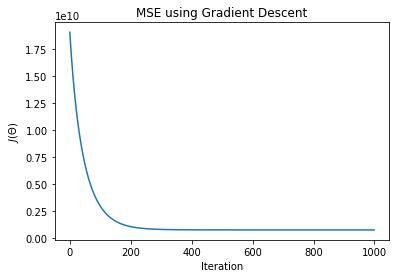

In [56]:
plt.plot(mse)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("MSE using Gradient Descent")

In [57]:
x_train.shape

(1460, 6)

In [58]:
def predict(x,theta):
    
    predictions= np.dot(x,theta)
    
    return predictions

In [59]:
x_test= featureNormalization(x_test)
x_test=np.append(np.ones((x_test.shape[0],1)),x_test,axis=1)
predict=predict(x_test,theta)

In [60]:
predict = pd.DataFrame({'Id': df_test['Id'],'SalePrice': predict[:,0]})

In [61]:
predict.shape

(1459, 2)

In [62]:
predict.head()

Id      SalePrice
0  1461  117644.516227
1  1462  166907.212021
2  1463  163051.588020
3  1464  184178.292112
4  1465  225338.794461

In [63]:
#save file submission
predict.to_csv('House Price submission.csv', index=False)